# Librerias

In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot
import warnings
warnings.filterwarnings('ignore')
import urllib.request
import requests
import os

# Estilo de graficas

In [2]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.set_style("whitegrid")

# Operaciones con valores faltantes

## Python

Por defecto en python los valores nulos son "None"

In [3]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
    # None + True,
    # None / False,
    type(None),
    sep="\n"
)

True
False
True
True
<class 'NoneType'>


Python no permite hacer ninguna operación con valores nulos

## Numpy

Numpy marca los valores nulos como "np.nan"

In [4]:
print(
    np.nan or True,
    np.nan or False,
    np.nan == np.nan,
    np.nan is np.nan,
    np.nan / 2,
    np.nan * 7,
    type(np.nan),
    np.isnan(np.nan),
    sep="\n"
)

nan
nan
False
True
nan
nan
<class 'float'>
True


is regresa falso y == verdadero. Esto es porque los np.nan son floats, por lo que podemos usarlo para hacer operaciones.

## Pandas

In [5]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


Pandas marca los valores nulos por default como "NaN", pero tambien entiende como valores nulos a "None" y "<NA>". 

In [6]:
test_missing_df.isna()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [7]:
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


isna y isnull son la misma función

In [8]:
pd.Series([1, np.nan])

0    1.0
1    NaN
dtype: float64

In [9]:
pd.Series([pd.to_datetime("2022-01-01"), np.nan])

0   2022-01-01
1          NaT
dtype: datetime64[ns]

In [10]:
pd.Series([-1]).isnull()

0    False
dtype: bool

Algunas veces pandas marca valores nulos con el -1

# Cargar los conjuntos de datos

## Pima indiands

In [11]:
response_1 = requests.get("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")

os.makedirs('/root/Platzi/CurDatosFalt_1/data', exist_ok=True)

with open(os.path.join('/root/Platzi/CurDatosFalt_1/data', 'diabetes.csv'), 'w') as f:
    f.write(response_1.text)

diabetes = pd.read_csv('/root/Platzi/CurDatosFalt_1/data/diabetes.csv')

## oceanbuoys, pedestrian y riskfactors

In [12]:
oceanbuoys = next(iter(pyreadr.read_r('/root/Platzi/CurDatosFalt_1/data/oceanbuoys.rda').values()))
pedestrian = next(iter(pyreadr.read_r('/root/Platzi/CurDatosFalt_1/data/pedestrian.rda').values()))
riskfactors = next(iter(pyreadr.read_r('/root/Platzi/CurDatosFalt_1/data/riskfactors.rda').values()))

# Extendiendo un poco pandas

In [13]:
%run Extend_pandas.ipynb

# Pasos para tabular valores faltantes

1) Hacer preguntas simples:  
    -¿Cuantos valores deberían haber en el conjunto de datos?  
    -¿Cuantos valores faltantes y completos hay en el conjunto de datos?  
  
2) Construir resumenes:  
    -¿Cuantos valores faltantes existen por cada variable?  
    -¿Cuantos valores faltantes existen por cada observación?  
    -¿Cuantas variables tienen $x$ número de valores faltantes?  
    -¿Cuantas observaciones tienen $x$ número de valores faltantes?  
  
3) Preguntas relacionadas al negocio:  
    -¿Cuantos valores faltantes tengo en una variable cada $x$ pasos (semanas, meses, días)?  
    -¿Cuál es mim racha de valores completos y faltantes?

# Tabulación de valores faltantes

1)

In [14]:
riskfactors.shape

(245, 34)

In [15]:
245*34

8330

In [16]:
riskfactors.missing.number_missing()

1186

In [17]:
riskfactors.missing.number_complete()

7144

2.

In [18]:
riskfactors.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [19]:
riskfactors.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


In [20]:
riskfactors.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


In [21]:
riskfactors.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


3.

In [22]:
riskfactors.missing.missing_variable_span(variable="weight_lbs", span_every=50)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


In [23]:
riskfactors.missing.missing_variable_run(variable="weight_lbs")

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Visualización de valores faltantes

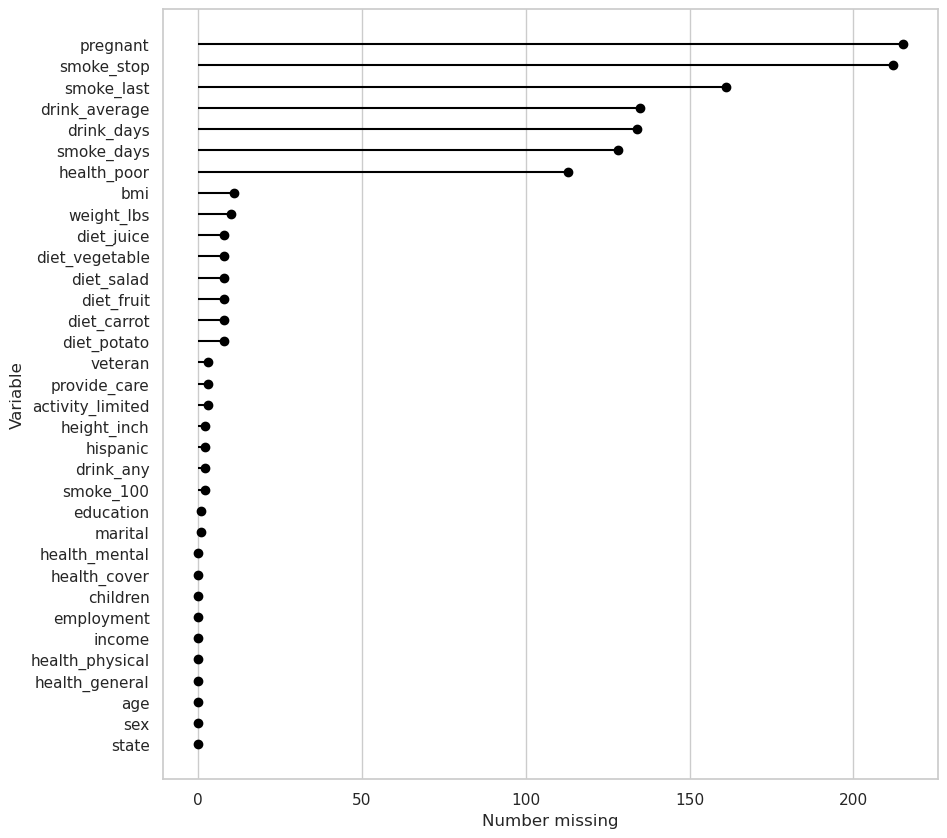

In [24]:
riskfactors.missing.missing_variable_plot()

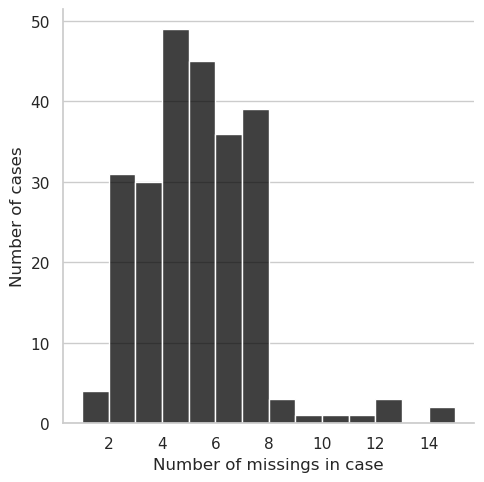

In [25]:
riskfactors.missing.missing_case_plot()

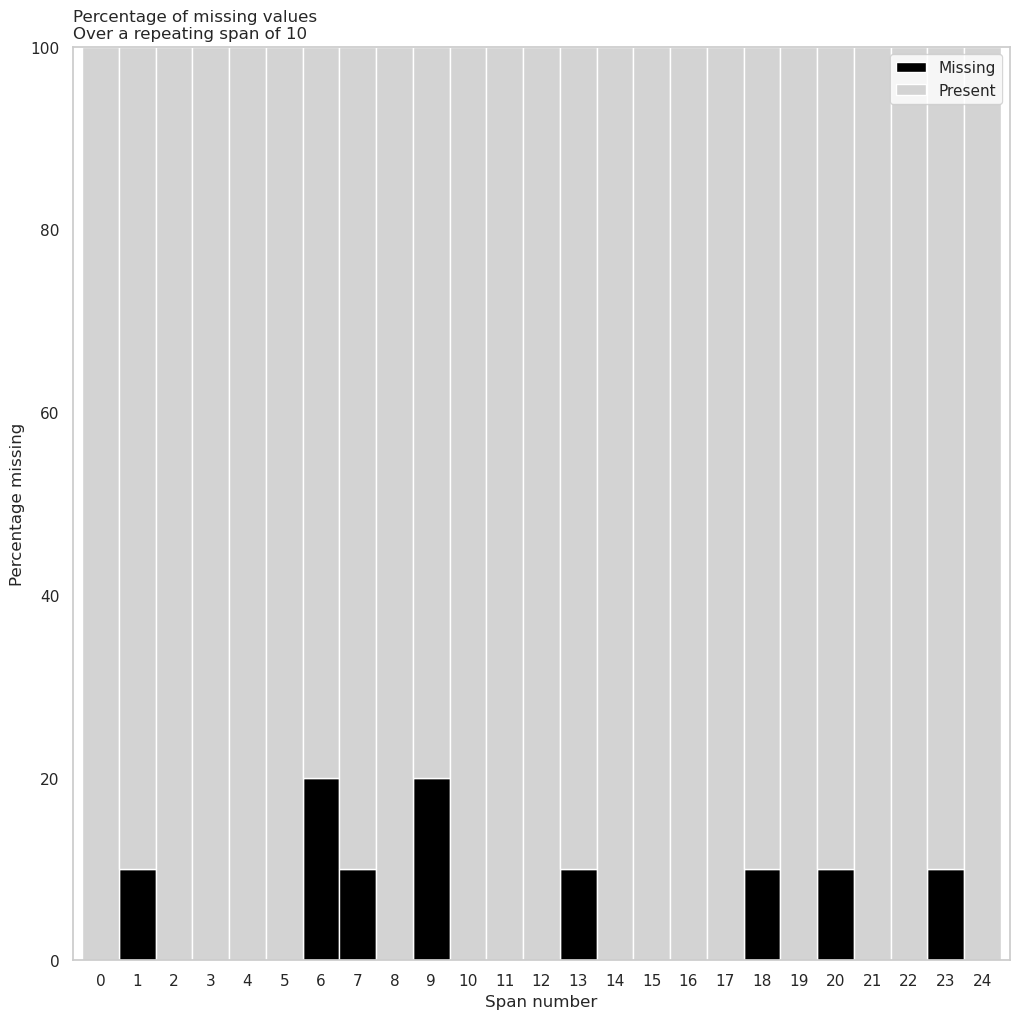

In [26]:
riskfactors.missing.missing_variable_span_plot(variable="weight_lbs", span_every=10)

<Axes: >

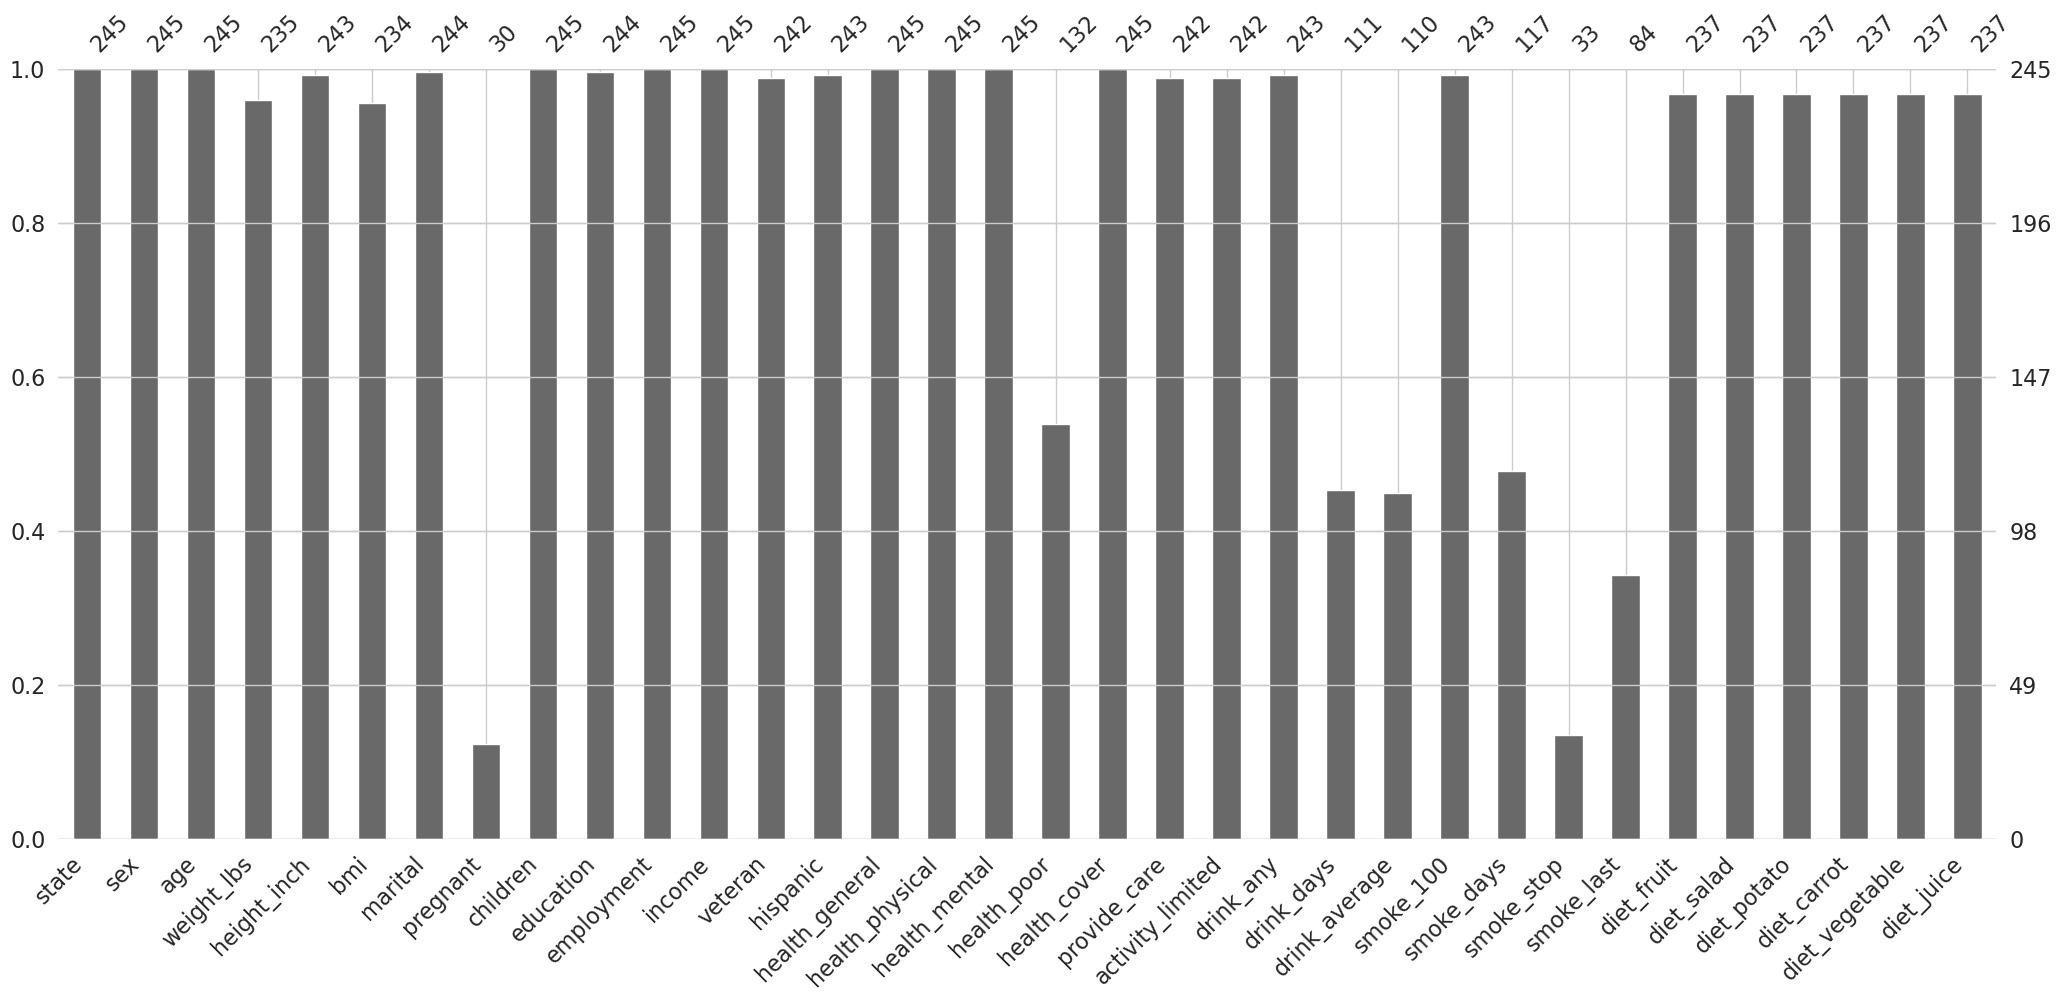

In [27]:
missingno.bar(df=riskfactors)

<Axes: >

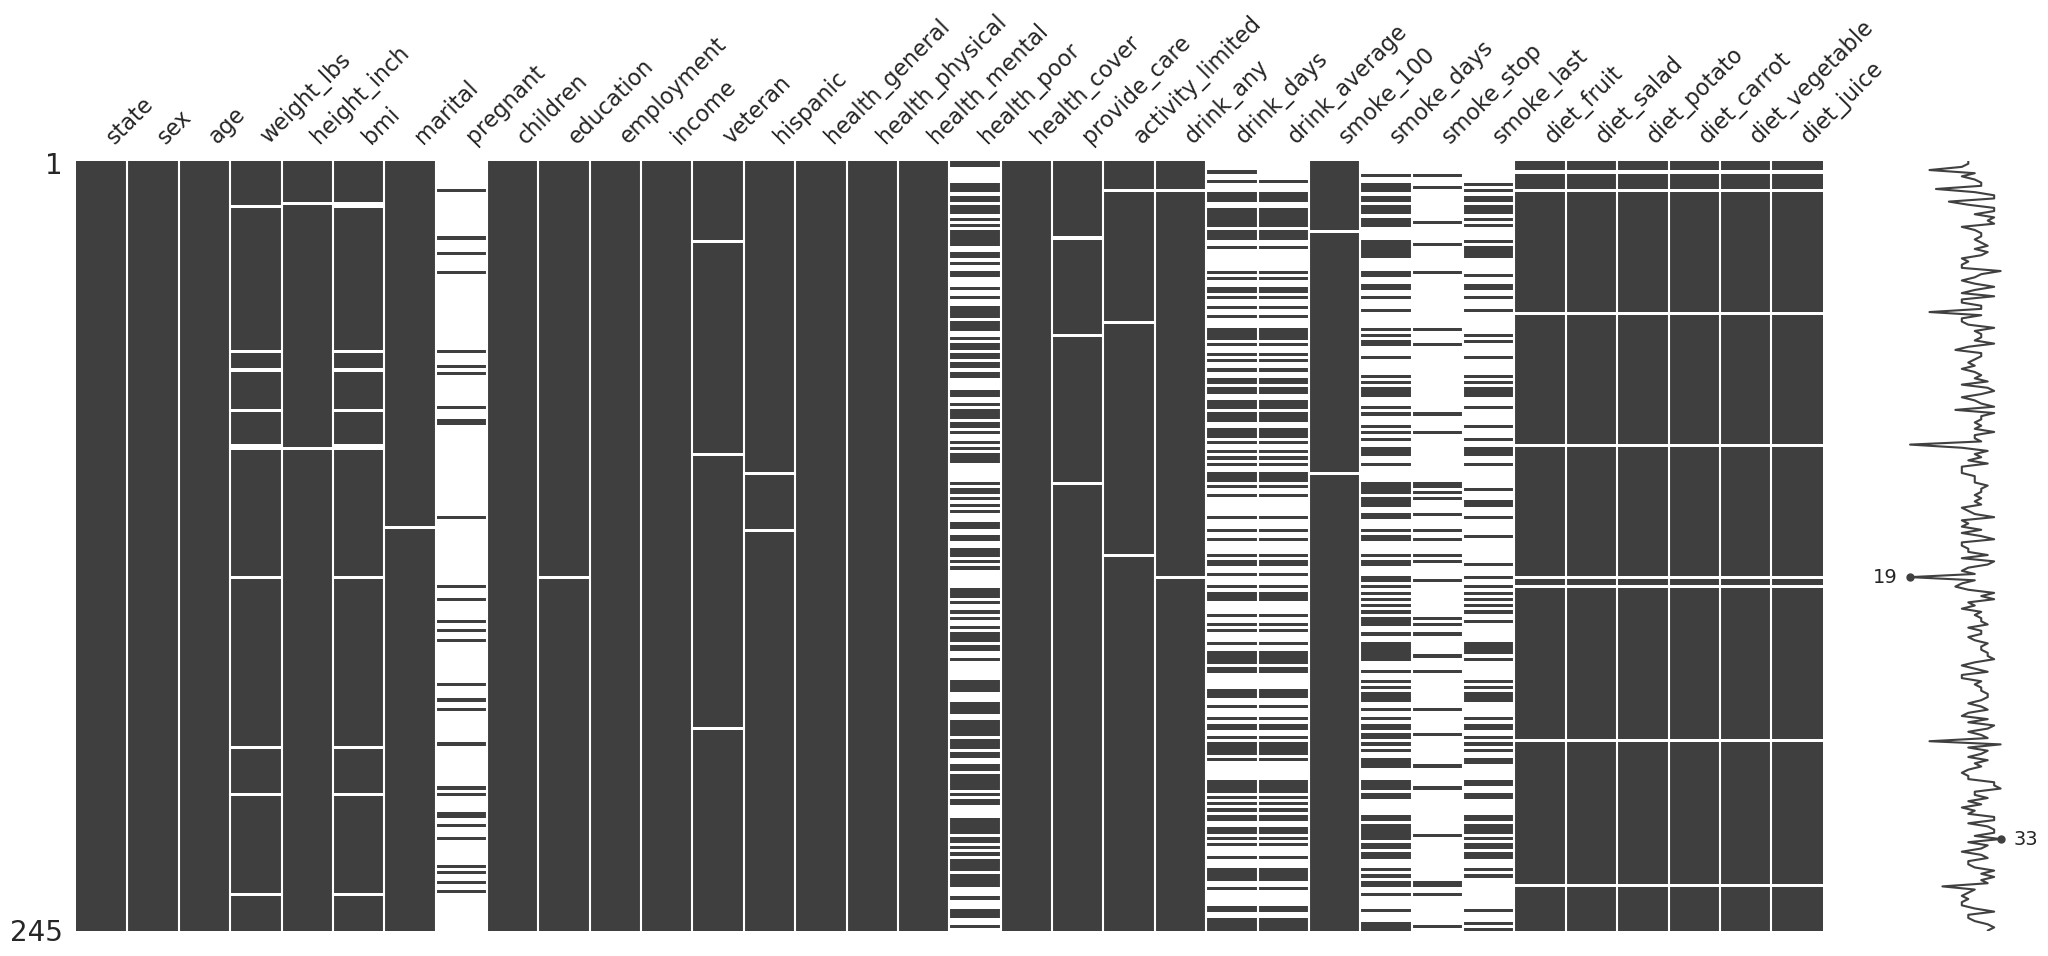

In [28]:
missingno.matrix(df=riskfactors)

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

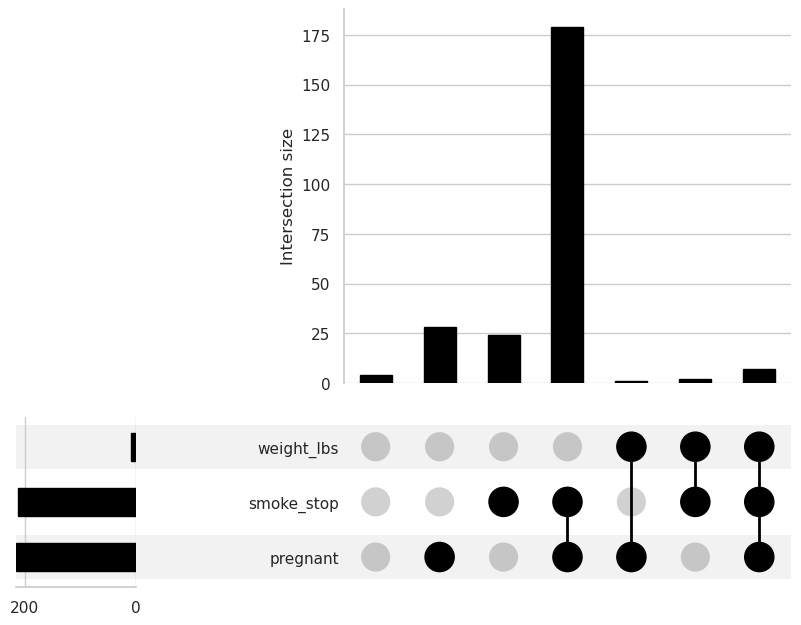

In [29]:
riskfactors.missing.missing_upsetplot(variables=["pregnant", "weight_lbs", "smoke_stop"], element_size=60)

## Codificación de valores faltantes

In [30]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

In [31]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

In [32]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

In [33]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [34]:
missing_data_example_df.select_dtypes(object).apply(pd.unique)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

In [35]:
pd.read_csv("/root/Platzi/CurDatosFalt_1/data/diabetes.csv", na_filter=True, na_values=[-99, -1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
missing_data_example_df.replace(to_replace=[-99, "NA"], value=np.nan)

,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


In [37]:
(
    missing_data_example_df
    .replace(
        to_replace={
            "x": {
                -99: np.nan, -98 : np.nan, "NA" : np.nan
            }
        }
    )
)

,x,y,z
0,1.0,A,-100
1,3.0,N/A,-99
2,NaN,NA,-98
3,NaN,E,-101
4,NaN,F,-1
5,NaN,G,-1


## Conversión de valores faltantes implicitos en explicitos

In [38]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

In [39]:
(
    implicit_to_explicit_df
    .pivot_wider(
        index="name",
        names_from="time",
        values_from="value"
    )
)

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


In [40]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=["name"]
    )
    .reset_index(name="n")
    .query("n < 2")
)

,name,n
1,zelda,1


In [41]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


In [42]:
(
    implicit_to_explicit_df
    .complete(
        {"name" : ["lynn", "zelda"]},
        {"time" : ["morning", "afternoon"]}
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,zelda,morning,320.0
3,zelda,afternoon,NaN
4,lynn,night,NaN


In [43]:
implicit_to_explicit_df.complete("name", "time", fill_value=np.nan)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


## Tipos de valores faltantes

1) MCAR: datos faltantes completamente al azar: la localización de los valores faltantes en el cojunto de datos icurre completamente al azar, esto no depende de nungún otro dato.  
2) MAR: datos faltantes al azar: la localización de los valores faltantes depende de otros valores observados  
3) MNAR: datos faltantes no al azar : la localización de los valores faltantes depende de los valores faltantes en sí mismos (difícil de detectar)

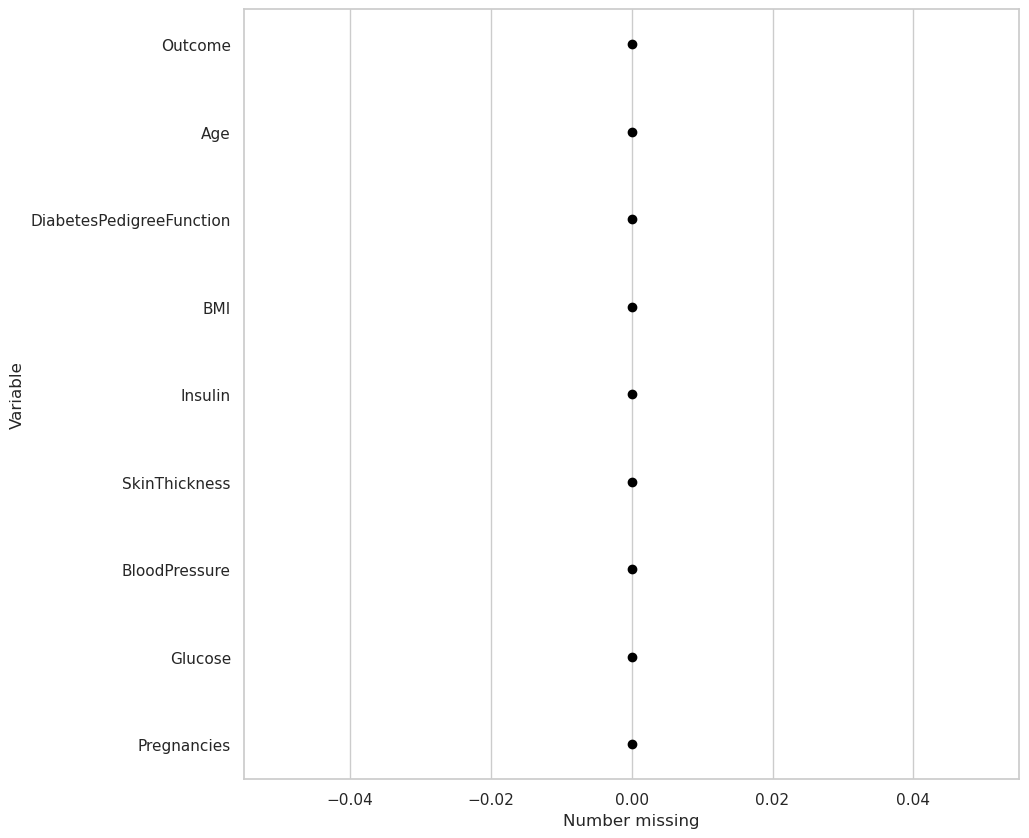

In [44]:
diabetes.missing.missing_variable_plot()

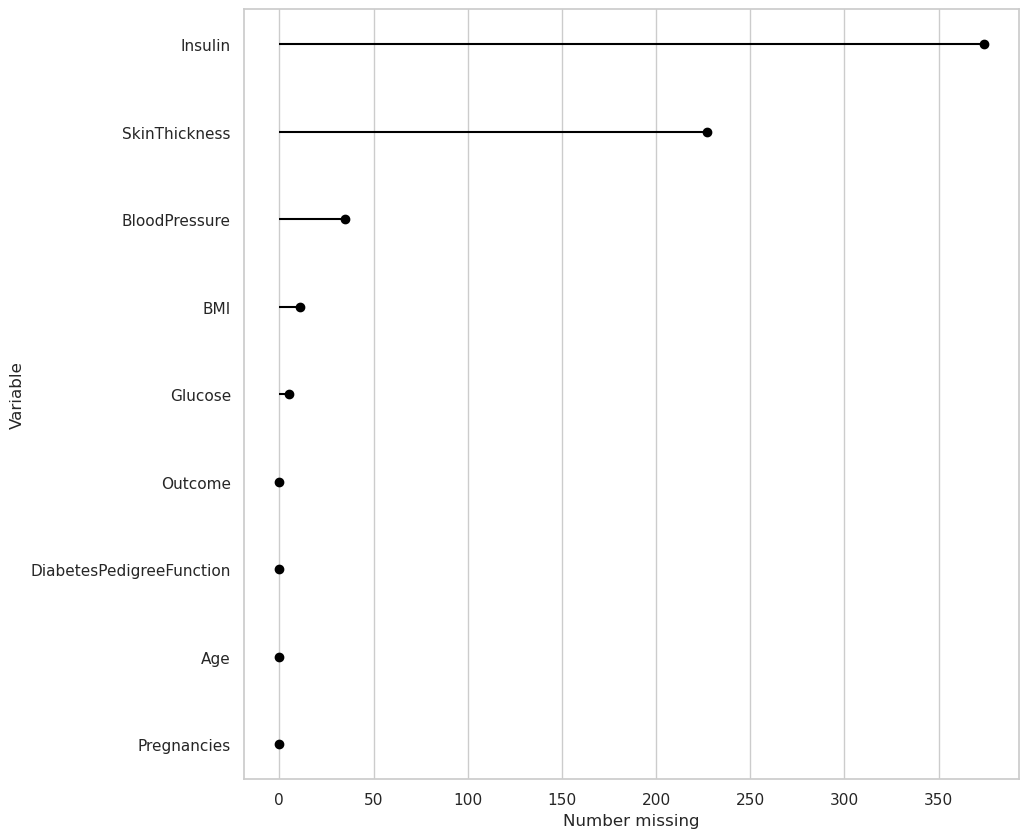

In [45]:
diabetes[diabetes.columns[1:6]] = diabetes[diabetes.columns[1:6]].replace(0, np.nan)
diabetes.missing.missing_variable_plot()

MCAR

<Axes: >

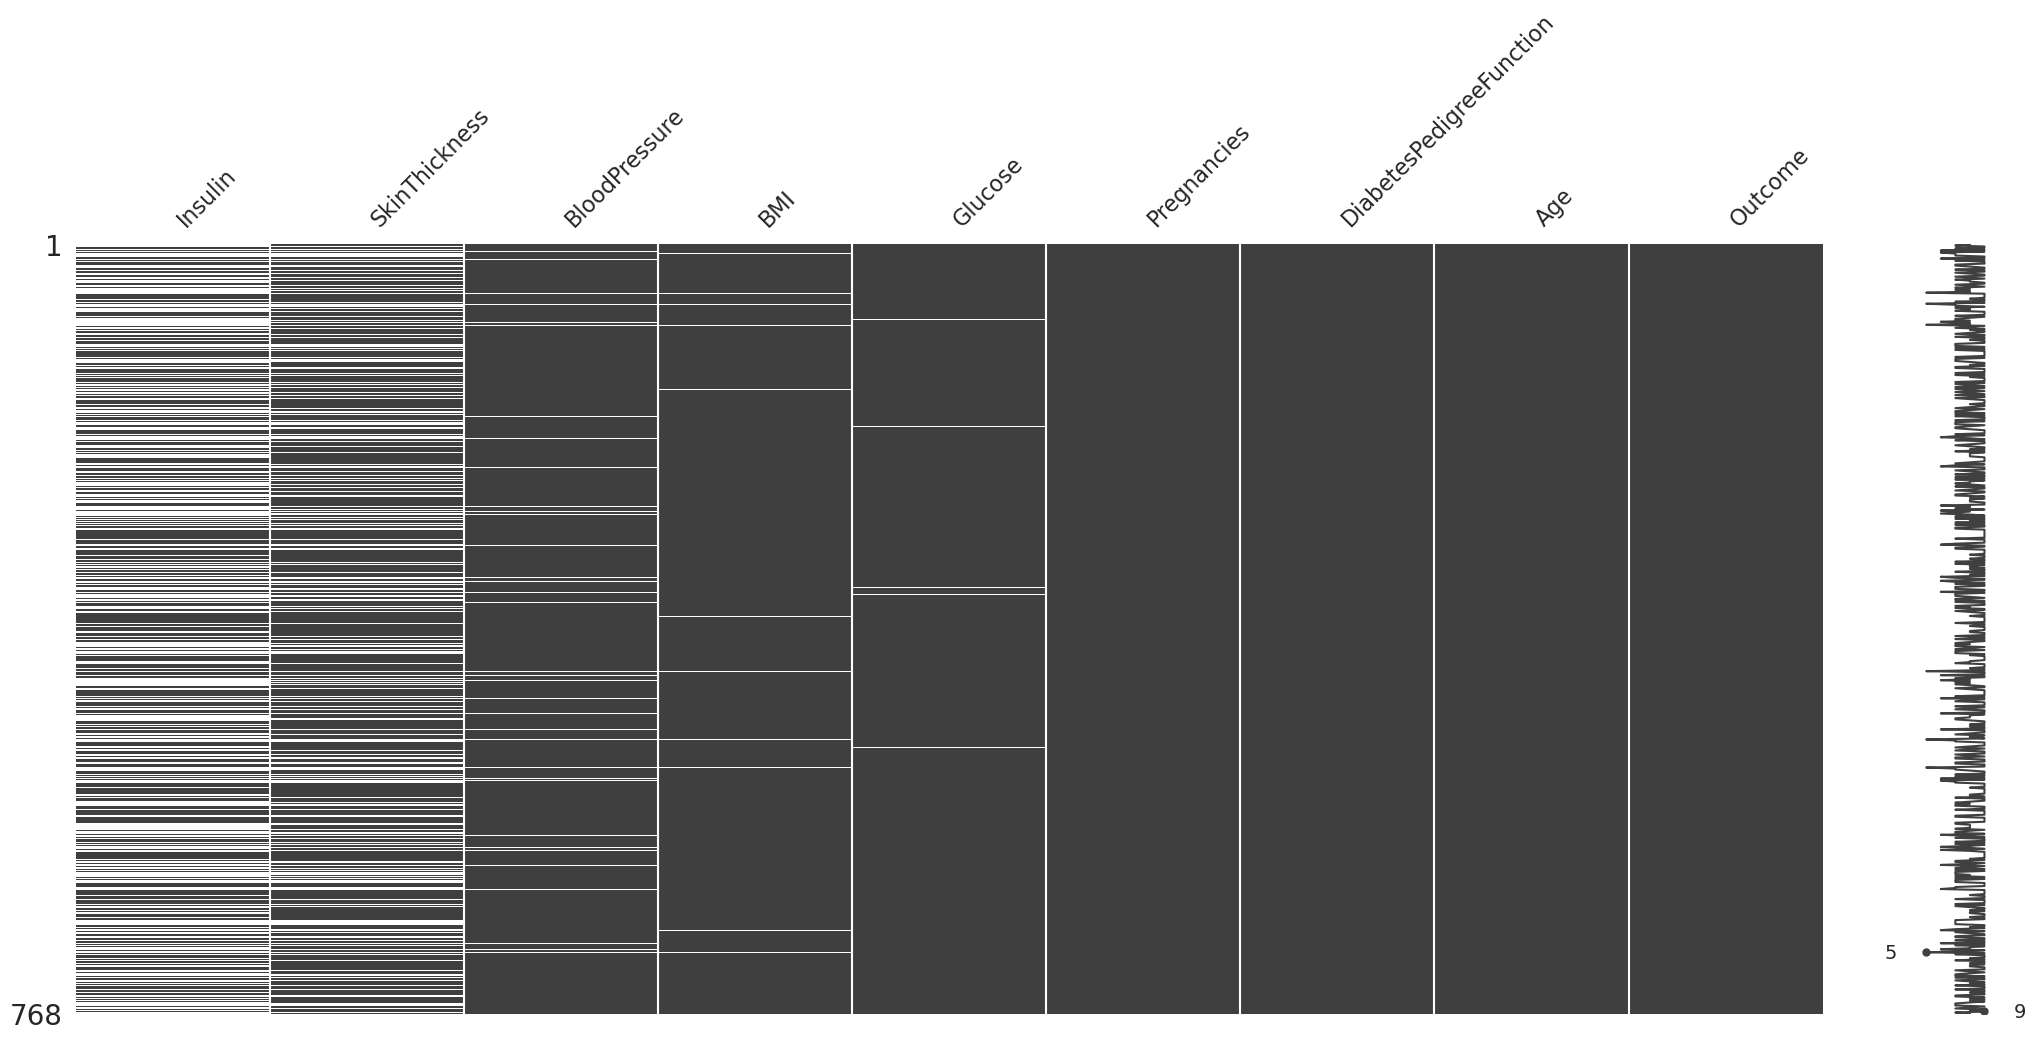

In [46]:
diabetes.missing.sort_variables_by_missingness().pipe(missingno.matrix)

<Axes: >

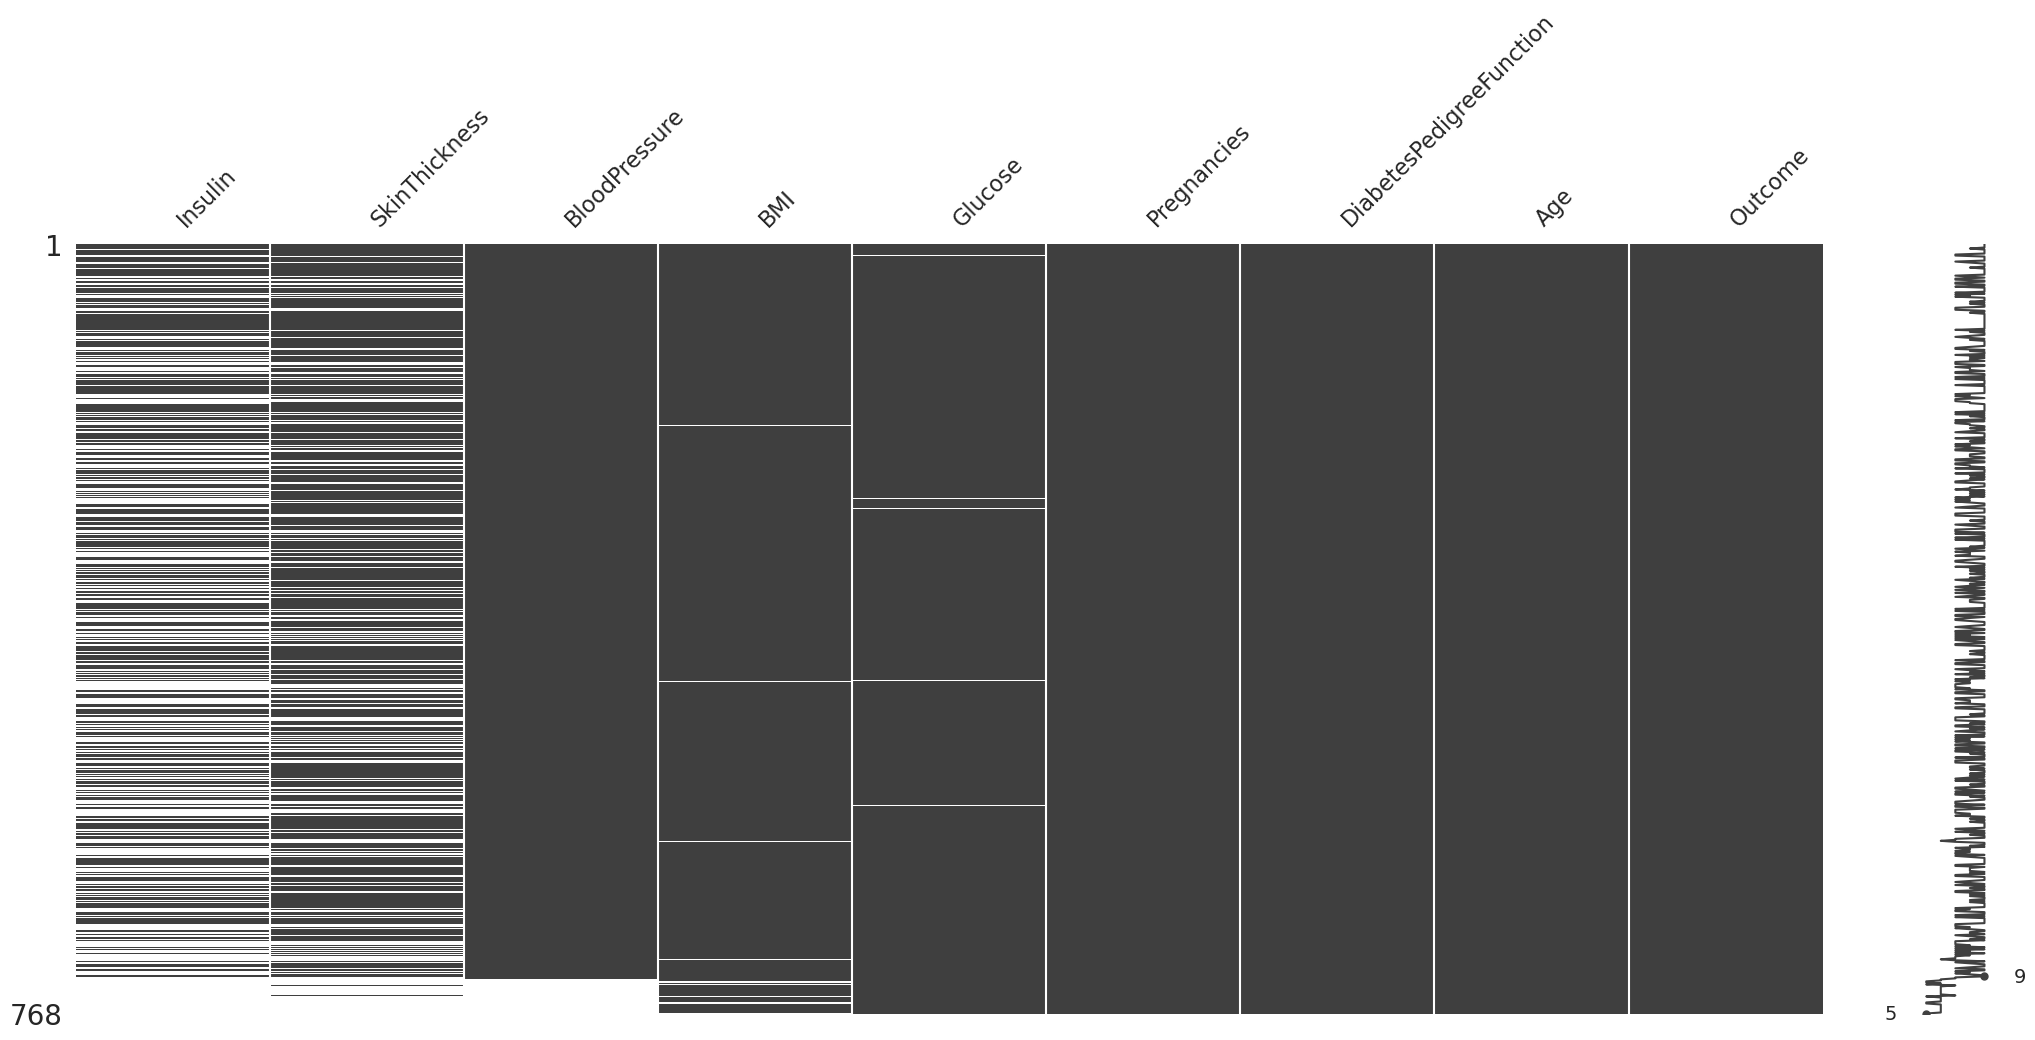

In [47]:
diabetes.missing.sort_variables_by_missingness().sort_values(by = "BloodPressure").pipe(missingno.matrix)

MNAR

<Axes: >

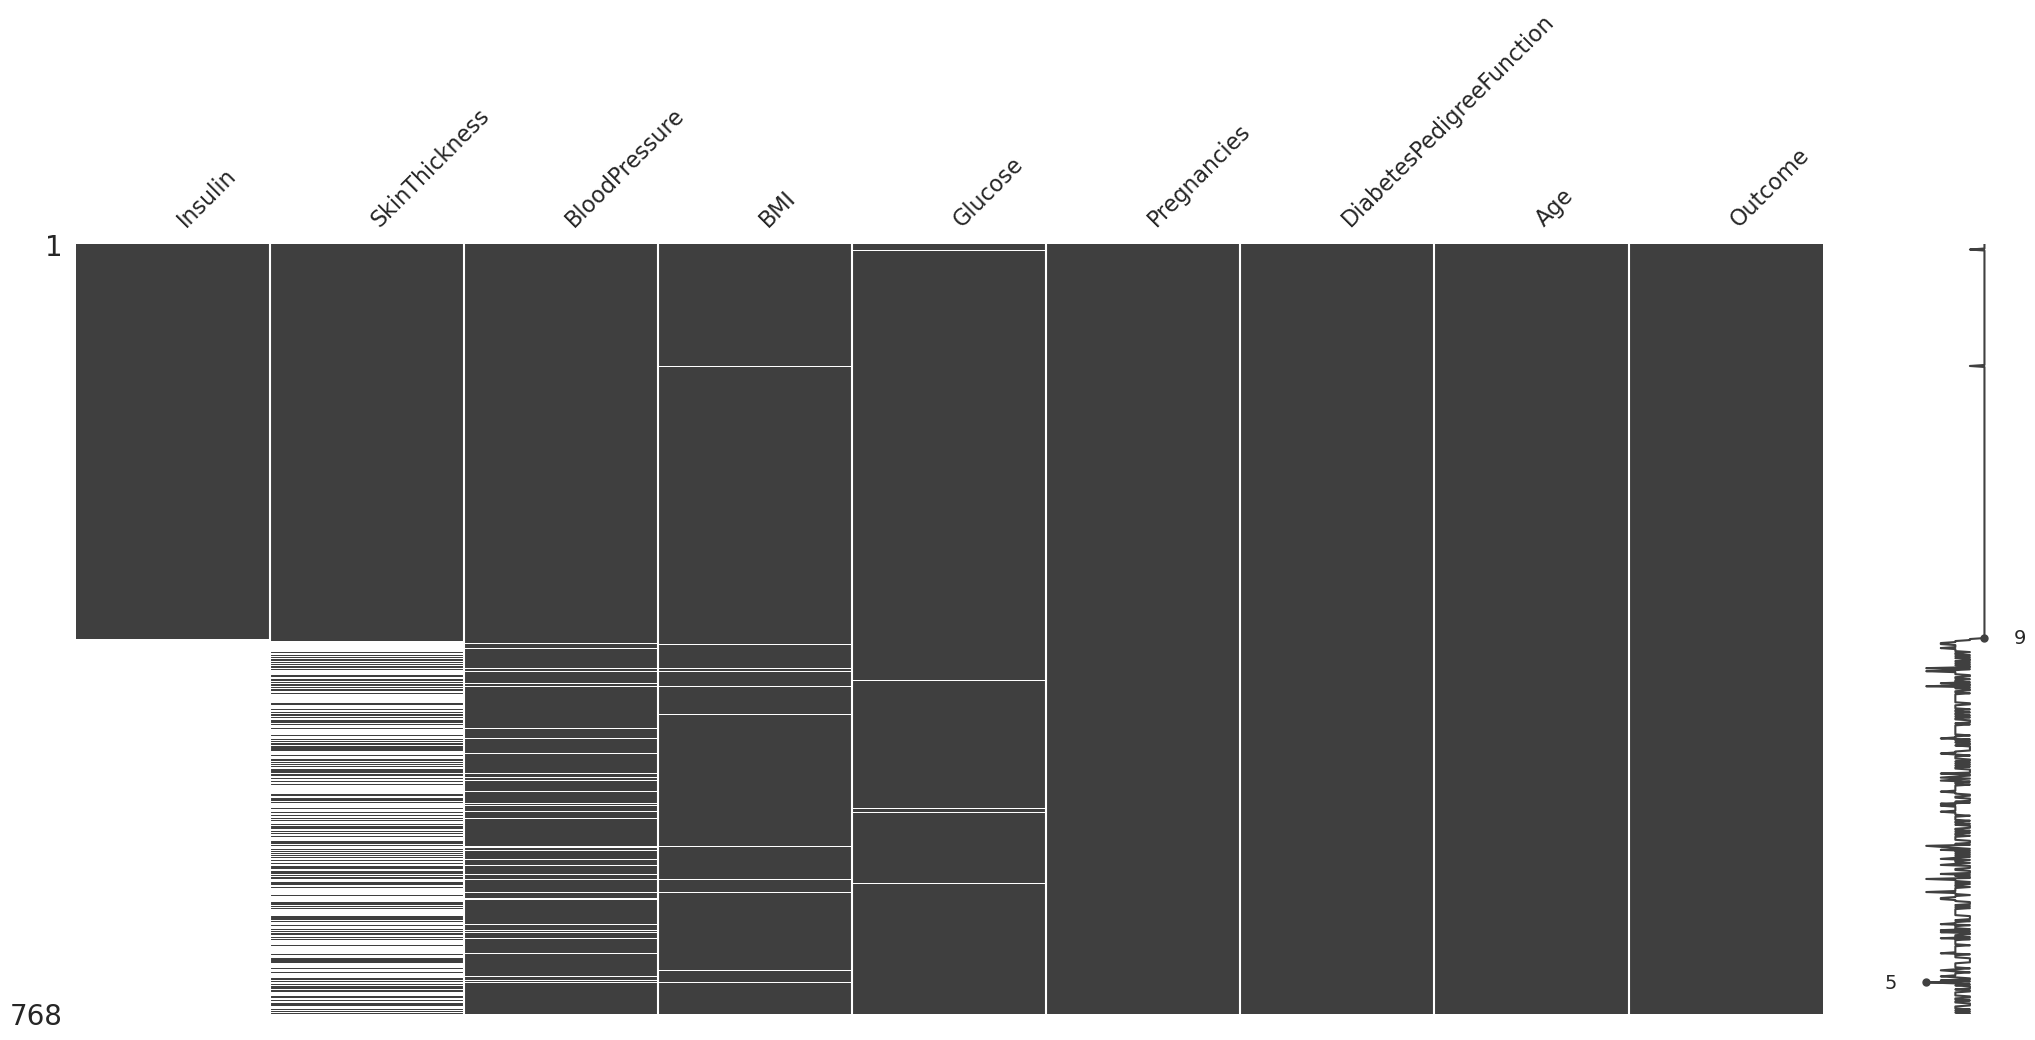

In [48]:
diabetes.missing.sort_variables_by_missingness().sort_values(by = "Insulin").pipe(missingno.matrix)

## Relación de valores faltantes

Matriz de sombras:

In [49]:
riskfactors.missing.bind_shadow_matrix(only_missing=True)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [50]:
riskfactors.missing.bind_shadow_matrix(only_missing=True).groupby(["weight_lbs_NA"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
weight_lbs_NA,,,,,,,,
Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


## Visualización de valores faltantes en una variable

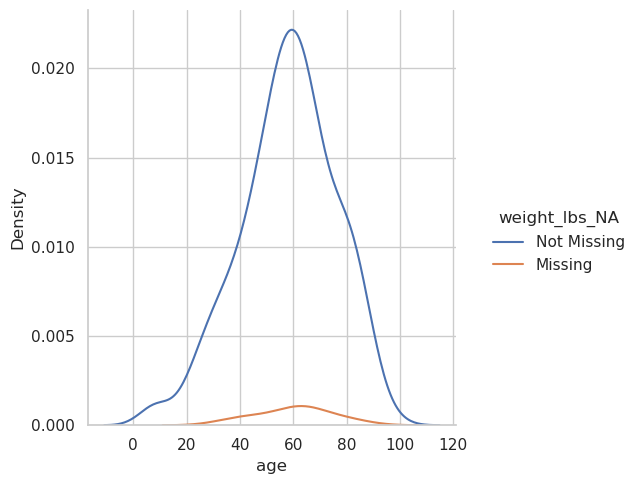

In [51]:
riskfactors.missing.bind_shadow_matrix(only_missing=True).pipe(lambda df: sns.displot(data = df, x = 'age', hue = "weight_lbs_NA", kind = 'kde'))

<Axes: xlabel='weight_lbs_NA', ylabel='age'>

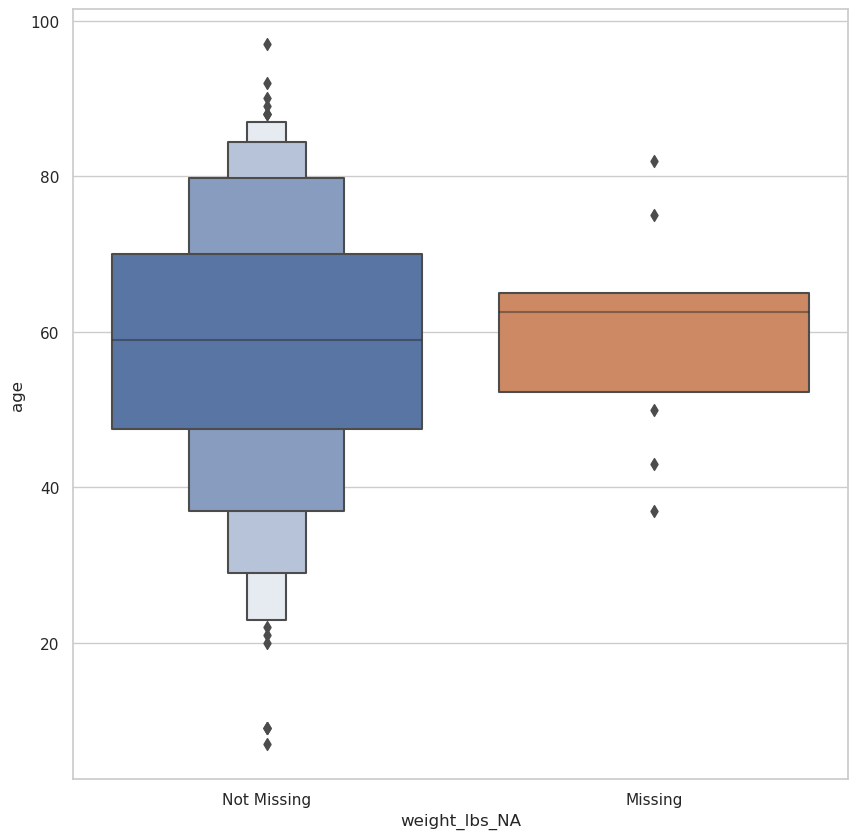

In [52]:
riskfactors.missing.bind_shadow_matrix(only_missing=True).pipe(lambda df: sns.boxenplot(data = df, y = 'age', x = "weight_lbs_NA"))

## Visualización de datos faltantes en dos variables

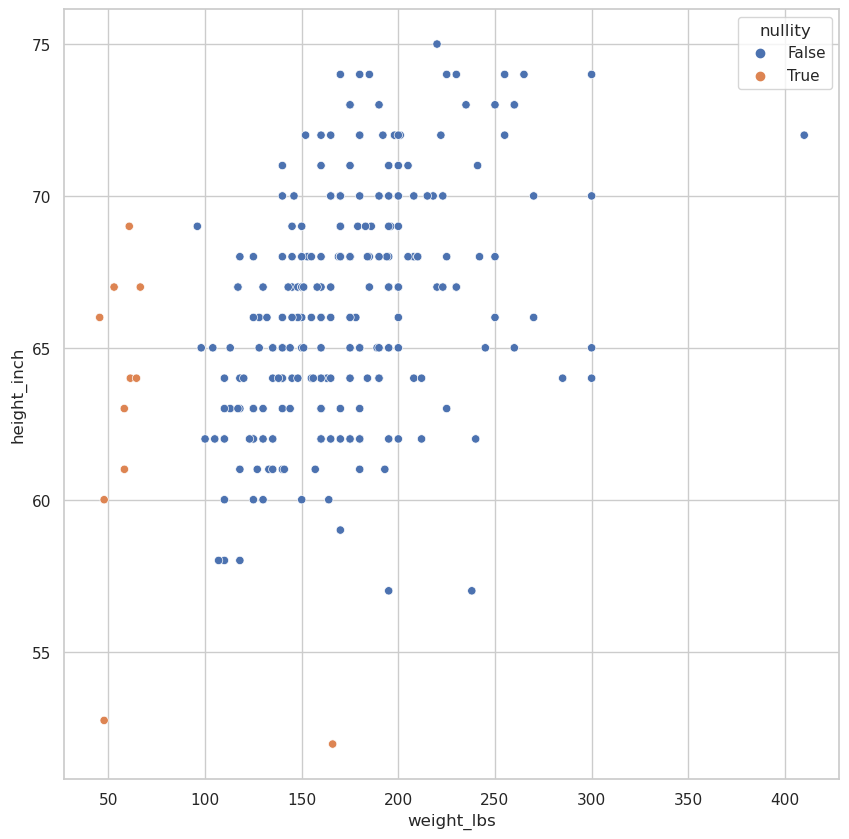

In [54]:
riskfactors.missing.scatterplot_valores_faltantes(columna_1 = "weight_lbs", columna_2 = "height_inch")

## Correlación de valores  faltantes

ValueError: could not convert string to float: '--'

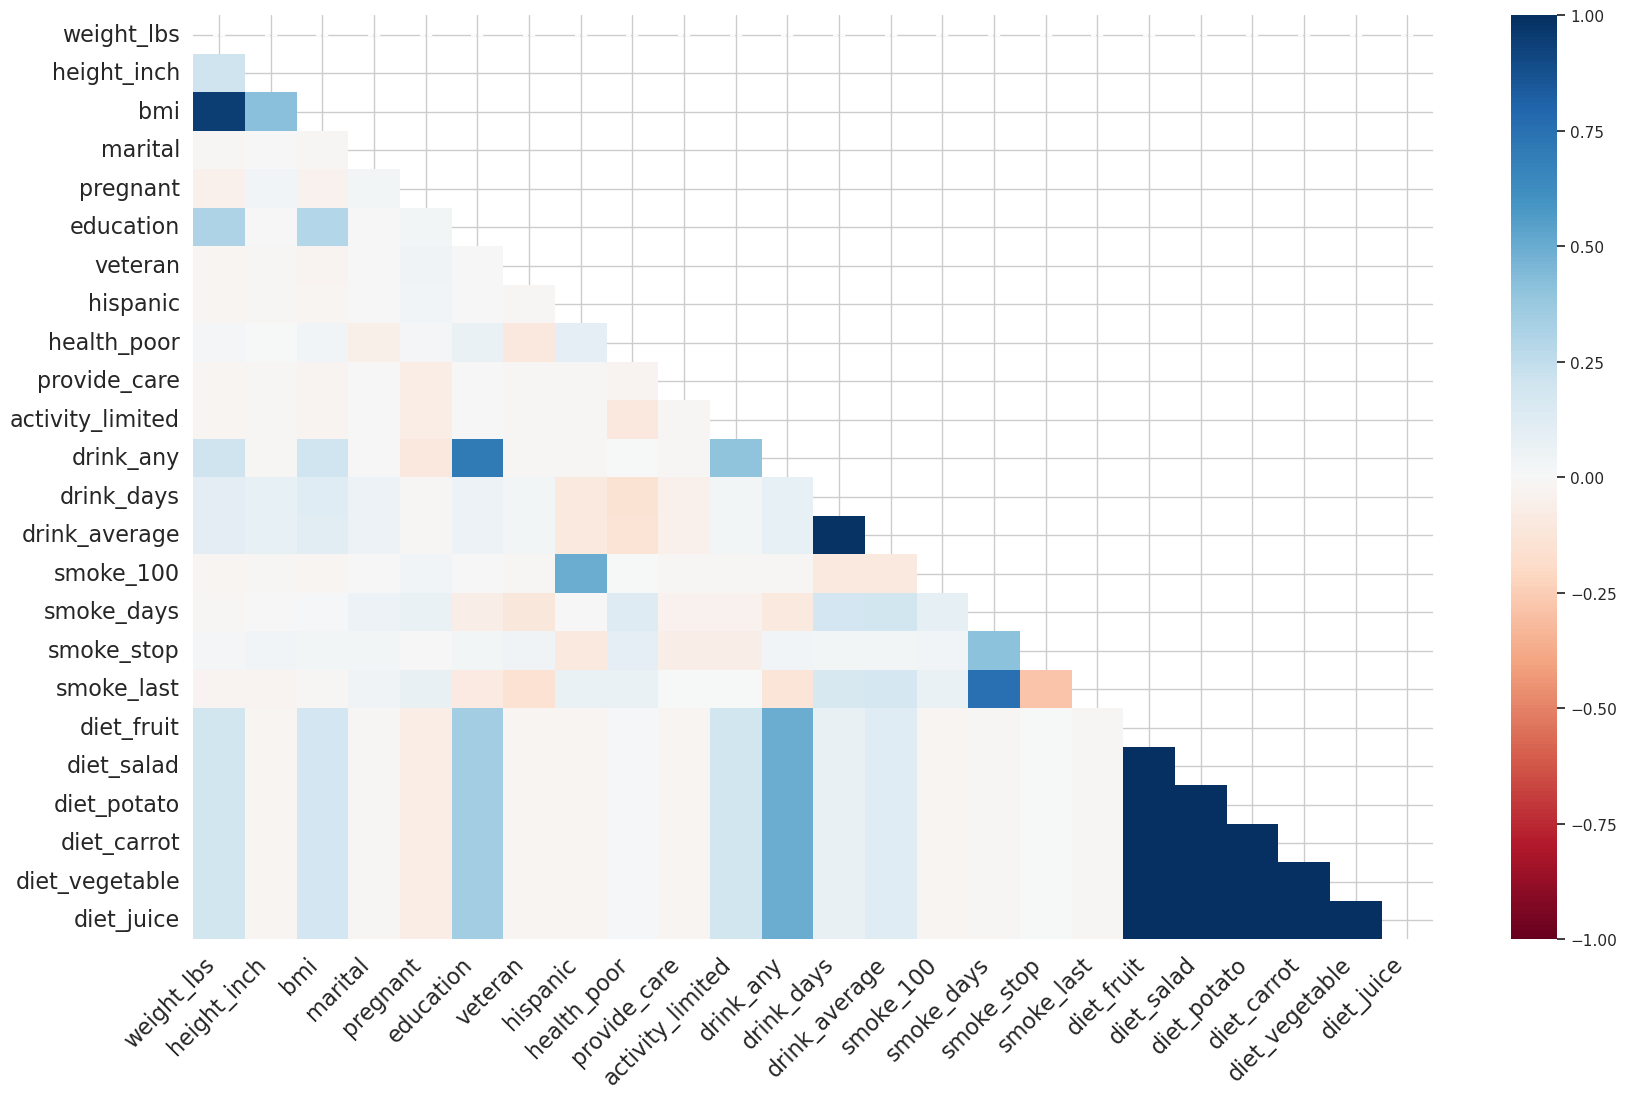

In [55]:
missingno.heatmap(df = riskfactors)

# Eliminación de valores faltantes

## Eliminación por pares

Eliminar datos faltantes solo cuando son MCAR.

Pairwise deletion: Ignorar en cada operación a los valores faltantes, pandas lo hace con mean(), mode(), var(), y demas estadisticos.
Para desactivarlo dataframe.mean(skipna = False)


Listwise Deletion: Se eliminan las observaciones donde hay valores faltantes de una columna especifica.

In [57]:
riskfactors.dropna(subset=["weight_lbs"], how = "any") # Si se escojen dos columnas, con how = all la condicion es un "y" y con how = any la condición es un "o"

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,No,NaN,NaN,NaN,-7,-7,-7,-7,-7,-7
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,No,NaN,NaN,NaN,52,52,52,24,52,24
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Yes,Not@All,NaN,7,365,156,104,52,730,365
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Yes,Everyday,No,NaN,730,0,24,156,104,0


# Imputación básica de valores faltantes